# Optical depth SIE model validation

* This notebook shows example how to use the `OpticalDepth` class to create an optical depth distribution for a 'SIE' model and make comparison with various models.

* You can change model or model parameters and compare the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)
from ler.lens_galaxy_population import OpticalDepth

Setting multiprocessing start method to 'fork'


In [2]:
# initialization with default parameters
od = OpticalDepth(verbose=True)

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_gengamma/velocity_dispersion_gengamma_14.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_16.pickle
Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chosen opti

### Let's look at the available functions and priors

In [3]:
od.available_velocity_dispersion_list_and_its_params

{'velocity_dispersion_gengamma': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 2.32,
  'beta': 2.67,
  'phistar': 0.0027439999999999995,
  'sigmastar': 161.0},
 'velocity_dispersion_bernardi': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 0.94,
  'beta': 1.85,
  'phistar': 0.02099,
  'sigmastar': 113.78},
 'velocity_dispersion_ewoud': {'vd_min': 50.0,
  'vd_max': 420.0,
  'alpha': 0.94,
  'beta': 1.85,
  'phistar': 0.02099,
  'sigmastar': 113.78}}

In [4]:
od.available_optical_depth_list_and_its_params

{'optical_depth_SIS_haris': None,
 'optical_depth_SIS_hemanta': None,
 'optical_depth_SIE_hemanta': None}

## Choice 1

* optical_depth_SIS_haris (analytical)

* velocity_dispersion_gengamma

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [4]:
od1 = OpticalDepth(
    npool=6,
    z_min=0.,
    z_max=10.,
    optical_depth_function="optical_depth_SIS_haris",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_gengamma",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min = 0., vd_max = 420., alpha = 2.32, beta = 2.67, phistar = 8.0e-3*cosmo.h**3, sigmastar = 161.0),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_gengamma interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_gengamma/velocity_dispersion_gengamma_10.pickle
Chosen velocity dispersion sampler: velocity_dispersion_gengamma
Chosen velocity dispersion sampler params: {'vd_min': 0.0, 'vd_max': 420.0, 'alpha': 2.32, 'beta': 2.67, 'phistar': 0.0027439999999999995, 'sigmastar': 161.0}
Chosen optical depth function: optical_depth_SIS_haris
Chosen axis ratio sampler: axis_ratio_rayleigh
Chosen axis ratio sampler params: {'q_min': 0.2, 'q_m

## Choice 2

* optical_depth_SIS_hemanta (numerical)

* velocity_dispersion_bernardi

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [5]:
od2 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIS_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_SIS_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_SIS_hemanta/optical_depth_SIS_hemanta_14.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth func

## Choice 3

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_bernardi

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [6]:
od3 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_17.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth func

## Choice 4

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_ewoud

* axis_ratio_rayleigh

* cosmo = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [7]:
od4 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_18.pickle
Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optic

## Choice 4

* optical_depth_SIE_hemanta (numerical)

* velocity_dispersion_ewoud

* axis_ratio_rayleigh

* cosmo = Planck18

In [8]:
from astropy.cosmology import Planck18

od5 = OpticalDepth(
    npool=6,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_SIE_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(Planck18.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=Planck18,
    directory="./interpolator_pickle",
    verbose=True,
    #create_new_interpolator=True,
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_5.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_5.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_5.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_5.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_11.pickle
optical_depth_SIE_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_SIE_hemanta/optical_depth_SIE_hemanta_19.pickle
Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.01895458581453365, 'sigmastar': 113.78}
Chosen optical depth fun

## Velocity dispersion

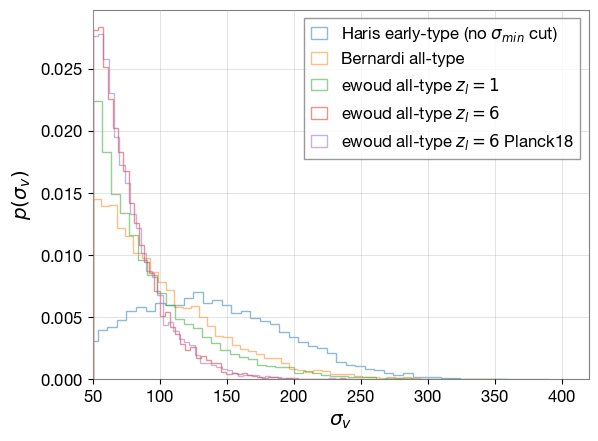

In [16]:
# plot hist
sigma1 = od1.sample_velocity_dispersion(size=10000,)
sigma2 = od2.sample_velocity_dispersion(size=10000)
sigma3 = od3.sample_velocity_dispersion(size=10000)
sigma4 = od4.sample_velocity_dispersion(size=10000, zl=1)
sigma5 = od4.sample_velocity_dispersion(size=10000, zl=6)
sigma6 = od5.sample_velocity_dispersion(size=10000, zl=6)
plt.hist(sigma1, bins=50, density=True, alpha=0.5, label=r"Haris early-type (no $\sigma_{min}$ cut)", histtype="step")
plt.hist(sigma2, bins=50, density=True, alpha=0.5, label="Bernardi all-type", histtype="step")
plt.hist(sigma4, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=1$", histtype="step")
plt.hist(sigma5, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=6$", histtype="step")
plt.hist(sigma6, bins=50, density=True, alpha=0.5, label="ewoud all-type $z_l=6$ Planck18", histtype="step")
plt.xlim(50, 420)
plt.xlabel(r"$\sigma_v$")
plt.ylabel(r"$p(\sigma_v)$")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

* It Ewoud velocity dispersion with zl dependence should roughly follow Halo-mass function.

## Optical depth

In [ ]:
# integrate optical depth wrt z
# vd_min lim vs no lim
from scipy.integrate import quad
tau1 = quad(lambda z: od1.strong_lensing_optical_depth(np.array([z]))[0], 0.001, 10)[0]
tau2 = quad(lambda z: od2.strong_lensing_optical_depth(np.array([z]))[0], 0.001, 10)[0]

tau1, tau2, tau2/tau1

(0.018224115533462808, 0.05279596175851599, 2.8970383589575555)

* around 3% difference between SIS (Choi et al. 2008) and SIS (Bernardi et al. 2010) models.

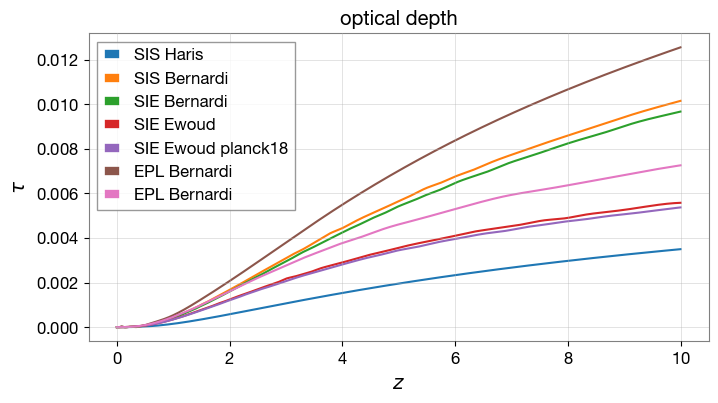

In [13]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS Haris")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS Bernardi")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE Ewoud ")
plt.plot(z, od5.strong_lensing_optical_depth(z), label=r"SIE Ewoud planck18")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.plot(z, od7.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

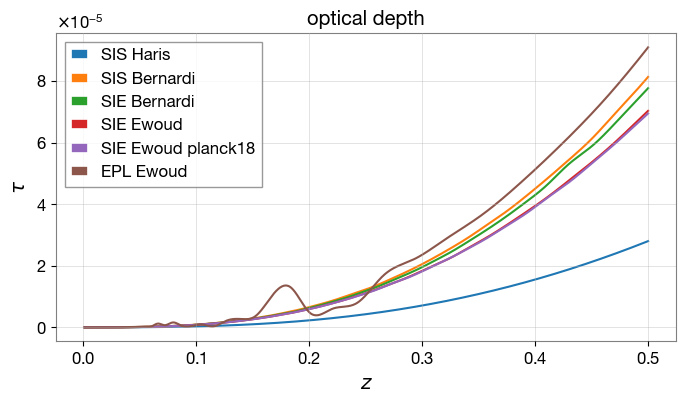

In [26]:
z = np.linspace(0.001, 0.5, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od1.strong_lensing_optical_depth(z), label=r"SIS Haris")
plt.plot(z, od2.strong_lensing_optical_depth(z), label=r"SIS Bernardi")
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od4.strong_lensing_optical_depth(z), label=r"SIE Ewoud ")
plt.plot(z, od5.strong_lensing_optical_depth(z), label=r"SIE Ewoud planck18")
#plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.plot(z, od7.strong_lensing_optical_depth(z), label=r"EPL Ewoud")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

## Distribution of velocity dispersion wrt redshift

* reproduction of Oguri et al. (2018b) Fig. 1 with Ewoud's (code) velocity dispersion model Wempe et al. (2022)

In [21]:
from ler.lens_galaxy_population import pdf_phi_z_div_0
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# combining sigma and q in a function
nsamples_z = 100
nsamples_sigma = 100
z = np.ones(nsamples_sigma)
sigma = np.linspace(50, 400, nsamples_sigma)


In [23]:
num1 = pdf_phi_z_div_0(sigma, z*1.0)
num2 = pdf_phi_z_div_0(sigma, z*2.0)
num3 = pdf_phi_z_div_0(sigma, z*3.0)
num4 = pdf_phi_z_div_0(sigma, z*4.0)
num5 = pdf_phi_z_div_0(sigma, z*5.0)
num6 = pdf_phi_z_div_0(sigma, z*6.0)

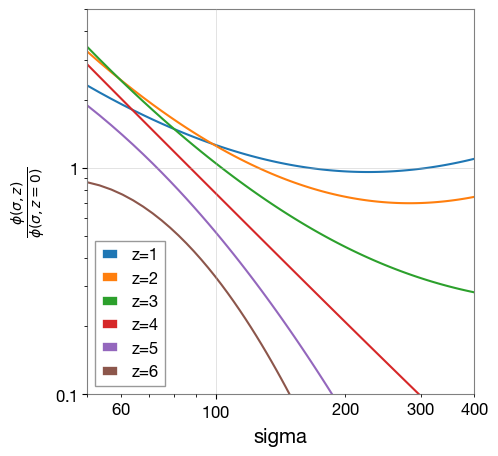

In [37]:
plt.figure(figsize=(5,5))
plt.plot(sigma, num1, label='z=1')
plt.plot(sigma, num2, label='z=2')
plt.plot(sigma, num3, label='z=3')
plt.plot(sigma, num4, label='z=4')
plt.plot(sigma, num5, label='z=5')
plt.plot(sigma, num6, label='z=6')
plt.xlabel('sigma')
plt.ylabel(r'$\frac{\phi(\sigma,z)}{\phi(\sigma,z=0)}$')
plt.yscale('log', base=10)
plt.xscale('log', base=10)
plt.ylim(1e-1,0.5e1)
plt.xlim(50, 400)
plt.grid(alpha=0.5)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [11]:
od6 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_EPL_SHEAR_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_bernardi",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=20)),
    )

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_bernardi interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_bernardi/velocity_dispersion_bernardi_7.pickle
optical_depth_EPL_SHEAR_hemanta interpolator will be loaded from ./interpolator_pickle/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_1.pickle
Chosen velocity dispersion sampler: velocity_dispersion_bernardi
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen o

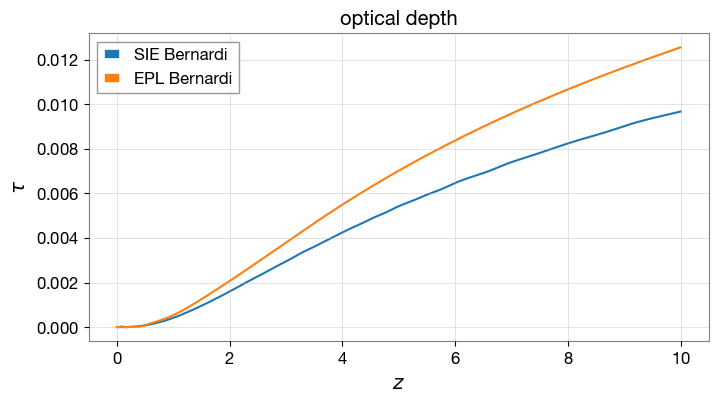

In [5]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

In [ ]:
z = np.linspace(0.001, 10, 1000)
# plot od.tau
plt.figure(figsize=(8,4))
plt.plot(z, od3.strong_lensing_optical_depth(z), label=r"SIE Bernardi")
plt.plot(z, od6.strong_lensing_optical_depth(z), label=r"EPL Bernardi")
plt.xlabel(r"$z$")
plt.ylabel(r"$\tau$")
#plt.xlim(0, 2)
#plt.ylim(0, 0.002)
plt.legend()
plt.grid(alpha=0.5)
plt.title("optical depth")
plt.show()

In [ ]:
od7 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=10.0,
    optical_depth_function="optical_depth_EPL_SHEAR_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=100)),
    )
#389m 8s= 6hr 29m 8s

z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_4.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_4.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_4.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_4.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_10.pickle
optical_depth_EPL_SHEAR_hemanta interpolator will be generated at ./interpolator_pickle/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_3.pickle
Computing optical depth with multiprocessing...


100%|██████████| 100/100 [6:29:07<00:00, 233.48s/it] 

Chosen velocity dispersion sampler: velocity_dispersion_ewoud
Chosen velocity dispersion sampler params: {'vd_min': 50.0, 'vd_max': 420.0, 'alpha': 0.94, 'beta': 1.85, 'phistar': 0.02099, 'sigmastar': 113.78}
Chosen optical depth function: optical_depth_EPL_SHEAR_hemanta
Chosen axis ratio sampler: axis_ratio_rayleigh
Chosen axis ratio sampler params: {'q_min': 0.2, 'q_max': 1}
Chosen cosmology: LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)
Chosen lens_type: sie_galaxy


In [ ]:
od7 = OpticalDepth(
    npool=8,
    z_min=0.0,
    z_max=1.0,
    optical_depth_function="optical_depth_EPL_SHEAR_hemanta",
    sampler_priors=dict(
        velocity_dispersion="velocity_dispersion_ewoud",  # zl dependent velocity dispersion
        axis_ratio="axis_ratio_rayleigh",
    ),
    sampler_priors_params=dict(
        velocity_dispersion=dict(vd_min=50., vd_max=420., alpha=0.94, beta=1.85, phistar=2.099e-2*(cosmo.h/0.7)**3, sigmastar=113.78),
        axis_ratio=dict(q_min=0.2, q_max=1),
    ),
    cosmology=cosmo,
    directory="./interpolator_pickle",
    verbose=True,
    create_new_interpolator=dict(optical_depth=dict(create_new=False, resolution=20)),
    )
#zmax=10, resolution=100, 389m 8s= 6hr 29m 8s

z_to_Dc interpolator will be generated at ./interpolator_pickle/z_to_Dc/z_to_Dc_8.pickle
Dc_to_z interpolator will be generated at ./interpolator_pickle/Dc_to_z/Dc_to_z_8.pickle
angular_diameter_distance interpolator will be generated at ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_8.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_8.pickle
velocity_dispersion_ewoud interpolator will be generated at ./interpolator_pickle/velocity_dispersion_ewoud/velocity_dispersion_ewoud_12.pickle
optical_depth_EPL_SHEAR_hemanta interpolator will be generated at ./interpolator_pickle/optical_depth_EPL_SHEAR_hemanta/optical_depth_EPL_SHEAR_hemanta_4.pickle
Computing optical depth with multiprocessing...


 60%|██████    | 12/20 [13:44<20:40, 155.01s/it]